# Notebook to Make Lorenz Curves

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

### Data In

In [39]:
# File paths

data_raw = '../../data/raw/'
data_temp = '../../temp_data/'
data_interim = '../../interim/'
data_analysis = '../../temp_data/ERL_data/Data20190222/'
erl_data = '../../temp_data/ERL_data/'
downloads = '/Users/cascade/Downloads/'

In [40]:
# Data

# GHS2000 = gpd.read_file(erl_data+'Data20190222/GHS_POP_GPW42000_final20190122.shp')
# GHS2015 = gpd.read_file(erl_data+'Data20190222/GHS_POP_GPW42015_final20190122.shp')
# WP2000 = gpd.read_file(erl_data+'Data20190222/AFR_PPP_2000_adj_v2_final20190122.shp')
# WP2015 = gpd.read_file(erl_data+'Data20190222/AFR_PPP_2015_adj_v2_final20190122.shp')
# LS2015 = gpd.read_file(erl_data+'Data20190222/WPE_1KM_2016_final20190122.shp')
# WPE2016 = gpd.read_file(erl_data+'Data20190222/LS15_final20190122.shp')

# Data with Rain Zones & Regions & FIDs Dropped (2019-02-13)

# GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_20190213.shp')
# GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_20190213.shp')
# WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_20190213.shp')
# WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_20190213.shp')
# LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_20190213.shp')
# WPE2016 = gpd.read_file(erl_data+'LS15_20190213.shp')

# Load data: ...20190222.shp files have FIDs removed, S Sudan added, rainfall zones, and regions

GHS2000 = gpd.read_file(data_analysis+'GHS_POP_GPW42000_20190222.shp', driver = 'ESRI Shapefile')
GHS2015 = gpd.read_file(data_analysis+'GHS_POP_GPW42015_20190222.shp', driver = 'ESRI Shapefile')
WP2000 = gpd.read_file(data_analysis+'AFR_PPP_2000_adj_v2_20190222.shp', driver = 'ESRI Shapefile')
WP2015 = gpd.read_file(data_analysis+'AFR_PPP_2015_adj_v2_20190222.shp', driver = 'ESRI Shapefile')
LS2015 = gpd.read_file(data_analysis+'WPE_1KM_2016_20190222.shp', driver = 'ESRI Shapefile')
WPE2016 = gpd.read_file(data_analysis+'LS15_20190222.shp', driver = 'ESRI Shapefile')

In [41]:
# List of datasets

datasets_in = [GHS2000, GHS2015, WP2000, WP2015, LS2015, WPE2016]

In [42]:
for dataset in datasets_in:
    print(len(dataset))

4220
4484
2078
2428
3726
3892


In [ ]:
GHS2000.head()

### Lorzen Curves

https://zhiyzuo.github.io/Plot-Lorenz/

#### Functions

In [43]:
def gini(series):
    
    ## series to array
    arr = series.values
    
    ## first sort
    sorted_arr = arr.copy(np.array)
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [44]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

# Calc Gini by country

In [48]:
test = GHS2000[GHS2000['PopTot'] < 5*10**6]
out = test.groupby('country').PopTot.agg(gini)
gini2015_df['gini-00'] = out.values

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  import sys


In [47]:
gini2015_df = pd.DataFrame()
gini2015_df['country'] = out.keys()
gini2015_df['gini-15'] = out.values

In [30]:
out.keys()

Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros',
       'Congo-Brazzaville', 'Côte d'Ivoire', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Réunion',
       'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan',
       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country')

In [49]:
gini2015_df['gini-dif'] = gini2015_df['gini-15'] - gini2015_df['gini-00']

In [50]:
gini2015_df

,country,gini-15,gini-00,gini-dif
0,Algeria,0.593291,0.645905,-0.052614
1,Angola,0.639189,0.644777,-0.005588
2,Benin,0.747768,0.688156,0.059613
3,Botswana,0.372562,0.454059,-0.081497
4,Burkina Faso,0.709987,0.623311,0.086676
5,Burundi,0.604948,0.475626,0.129322
6,Cameroon,0.774973,0.724136,0.050837
7,Cape Verde,0.370536,0.324729,0.045808
8,Central African Republic,0.635196,0.611329,0.023866
9,Chad,0.522907,0.479576,0.043331


In [ ]:
fao_ag = pd.read_csv(data_temp+'Macro-Statistics_Key_Indicators_E_Africa.csv')

In [ ]:
# Value added as share gpd 2010 prices

value = fao_ag.loc[(fao_ag['Item Code'] == 22016) & (fao_ag['Element Code'] == 6169)]

In [ ]:
ag2000_df = value.filter(['Area', 'Y2000'])
ag2000_df.columns = ag_df.columns.str.replace('Area', 'country')

In [ ]:
ag2000_df.head()

In [ ]:
ag_result = pd.merge(ag2000_df, ag2015_df, on='country', how='inner')
ag_result

In [ ]:
result = pd.merge(gini_df, ag_df, on='country', how='inner')

In [ ]:
result.head()

In [ ]:
plt.scatter(result.gini, result.Y2015, marker='.', color='Red', s=100, alpha = 0.5)
plt.xlabel('Urban Settlement Gini Coeff by Country 2015')
plt.ylabel('Value added by Agriculture as Share of GDP')

#### Select data

In [ ]:
## Rain Zone
# X = np.sort(np.array(GHS2000[GHS2000['rain_zone'] == 'Semi-arid'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['rain_zone'] == 'Semi-arid'].PopTot))

# print(len(X))
# print(len(Y))
## Country
# X = np.sort(np.array(GHS2000[GHS2000['country'] == 'South Africa'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['country'] == 'South Africa'].PopTot))

## All Africa 
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

## Conditional
# X = np.sort(np.array(GHS2000[GHS2000['PopTot'] < 5*10**6].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['PopTot'] < 5*10**6].PopTot))

# X = GHS2000.loc[(GHS2000['rain_zone'] == 'Arid') & (GHS2000['country'] != 'Egpyt')]
# X = np.sort(np.array(X.PopTot))

# Y = GHS2015.loc[(GHS2015['rain_zone'] == 'Arid') & (GHS2015['country'] != 'Egpyt')]
# Y = np.sort(np.array(Y.PopTot))


# X = X[(X < 5*10**6)]
# Y = Y[(Y < 5*10**6)]

print(len(X))
print(len(Y))

In [ ]:
# Curves 

# A = np.sort(np.array(GHS2000[GHS2000['country'] == 'Ghana'].PopTot))
# B = np.sort(np.array(GHS2000[GHS2000['country'] == 'Nigeria'].PopTot))
# C = np.sort(np.array(GHS2000[GHS2000['country'] == 'Zambia'].PopTot))

# A_lorenz = A.cumsum() / A.sum()
# A_lorenz = np.insert(A_lorenz, 0, 0)
# A_lorenz[0], A_lorenz[-1]

# B_lorenz = B.cumsum() / B.sum()
# B_lorenz = np.insert(B_lorenz, 0, 0)
# B_lorenz[0], B_lorenC[-1]

# C_lorenz = C.cumsum() / C.sum()
# C_lorenz = np.insert(C_lorenz, 0, 0)
# C_lorenz[0], C_lorenz[-1]

In [ ]:
# Curves 

title = 'Africa'

V = np.sort(np.array(GHS2000.PopTot))
W = np.sort(np.array(GHS2015.PopTot))

#V = np.sort(np.array(GHS2000[GHS2000['country'] == title].PopTot))
#W = np.sort(np.array(GHS2015[GHS2015['country'] == title].PopTot))

# W = np.sort(np.array(GHS2015[GHS2015['country'] == 'South Africa'].PopTot))
# X = np.sort(np.array(GHS2015[GHS2015['country'] == 'Ghana'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['country'] == 'Nigeria'].PopTot))
# Z = np.sort(np.array(GHS2015[GHS2015['country'] == 'Zambia'].PopTot))

# V_lorenz = V.cumsum() / V.sum()
# V_lorenz = np.insert(V_lorenz, 0, 0)
# V_lorenz[0], V_lorenz[-1]

# W_lorenz = W.cumsum() / W.sum()
# W_lorenz = np.insert(W_lorenz, 0, 0)
# W_lorenz[0], W_lorenz[-1]

# X_lorenz = X.cumsum() / X.sum()
# X_lorenz = np.insert(X_lorenz, 0, 0)
# X_lorenz[0], X_lorenz[-1]

# Y_lorenz = Y.cumsum() / Y.sum()
# Y_lorenz = np.insert(Y_lorenz, 0, 0)
# Y_lorenz[0], Y_lorenz[-1]

# Z_lorenz = Z.cumsum() / Z.sum()
# Z_lorenz = np.insert(Z_lorenz, 0, 0)
# Z_lorenz[0], Z_lorenz[-1]

In [69]:
## Rain Zone
title = 'Algeria'
col = 'country'
X = np.sort(np.array(GHS2000[GHS2000[col] == title].PopTot))
Y = np.sort(np.array(GHS2015[GHS2015[col] == title].PopTot))

## All Africa
# title = 'Africa'
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

# X = X[(X < 5*10**6)]
# Y = Y[(Y < 5*10**6)]

X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

Y_lorenz = Y.cumsum() / Y.sum()
Y_lorenz = np.insert(Y_lorenz, 0, 0)
Y_lorenz[0], Y_lorenz[-1]

(0.0, 1.0)

In [80]:
X_zipf

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


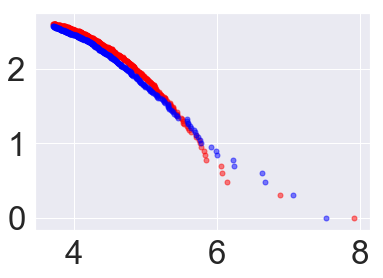

In [123]:
# Zipf's law

X1_zipf = np.array(GHS2015[GHS2015['rain_zone'] == 'Arid'].PopTot.sort_values())
Y1_zipf = list(range(1, len(X1_zipf)+1))
Y1_zipf = Y1_zipf[::-1]

X2_zipf = np.array(GHS2000[GHS2000['rain_zone'] == 'Arid'].PopTot.sort_values())
Y2_zipf = list(range(1, len(X2_zipf)+1))
Y2_zipf = Y2_zipf[::-1]


plt.scatter(np.log10(X1_zipf), np.log10(Y1_zipf), marker='.', color='Red', s=100, alpha = 0.5)
plt.scatter(np.log10(X2_zipf), np.log10(Y2_zipf), marker='.', color='Blue', s=100, alpha = 0.5)

In [100]:
df = pd.DataFrame()
df['Pop'] = X_zipf
df['Rank'] = Y_zipf
df

,Pop,Rank
0,5.057078e+03,157
1,5.144035e+03,156
2,5.196246e+03,155
3,5.239019e+03,154
4,5.252520e+03,153
5,5.310312e+03,152
6,5.313969e+03,151
7,5.339636e+03,150
8,5.359156e+03,149
9,5.401514e+03,148


In [ ]:
print(len(Z))
print(len(Pop))
len(Z_lorenz)

In [63]:
# find thresholds of urban population held by settlment rank
title = 'Sub-humid'
col = 'rain_zone'
dataset = GHS2015
#Z = np.sort(np.array(dataset[dataset[col] == title].PopTot))
Z = np.sort(np.array(dataset.PopTot))

Z = Z[(Z < 5*10**6)]

Z_lorenz = Z.cumsum() / Z.sum()
Z_lorenz = np.insert(Z_lorenz, 0, 0)
Z_lorenz[0], Z_lorenz[-1]

Pop = np.insert(Z, 0, 0)

df = pd.DataFrame()
df['x-axis'] = np.arange(Z_lorenz.size)/(Z_lorenz.size-1)
df['y-axis'] = Z_lorenz
df['PopTot'] = Pop

In [ ]:
df[3720:3800]

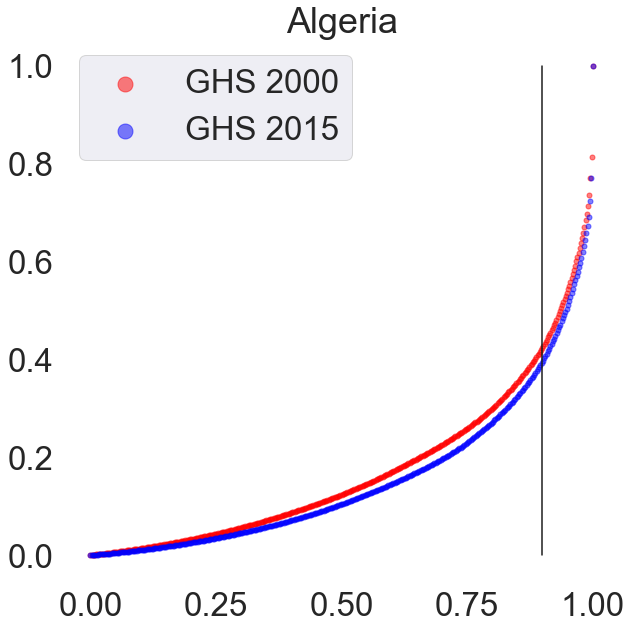

In [70]:
%matplotlib inline

## Size & number
sns.set(font_scale=3)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))


## scatter plot of Lorenz curve
# ax1.scatter(np.arange(V_lorenz.size)/(V_lorenz.size-1), V_lorenz, 
#            marker='.', color='orange', s=100, alpha = 0.5)

# ax1.scatter(np.arange(W_lorenz.size)/(W_lorenz.size-1), W_lorenz, 
#            marker='.', color='purple', s=100, alpha = 0.5)

ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Red', s=100, alpha = 0.5)

ax1.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
           marker='.', color='Blue', s=100, alpha = 0.5)

# ax1.scatter(np.arange(Z_lorenz.size)/(Z_lorenz.size-1), Z_lorenz, 
#            marker='.', color='Orange', s=100, alpha = 0.5)

# ax1.scatter(np.arange(A_lorenz.size)/(A_lorenz.size-1), A_lorenz, 
#            marker='*', color='Blue', s=100, alpha = 0.5)

# ax1.scatter(np.arange(B_lorenz.size)/(B_lorenz.size-1), B_lorenz, 
#            marker='*', color='Purple', s=100, alpha = 0.5)

# ax1.scatter(np.arange(C_lorenz.size)/(C_lorenz.size-1), C_lorenz, 
#            marker='*', color='Orange', s=100, alpha = 0.5)


## Title
plt.title(title)
leg = ['GHS 2000', 'GHS 2015']
plt.legend(leg,loc=2, markerscale=3)

## line plot of equality
ax1.plot([0.9,0.9], [0,1] , color='k')

#remove ticks
# ax.set_xticks([])
# ax.set_yticks([])

# Set Color
ax1.set_facecolor('White')

#fig.savefig('/Users/cascade/Desktop/'+title+'_Lorenz.png', dpi=700)

In [ ]:
# test = np.log(GHS2000[GHS2000['country'] == 'Nigeria'].PopTot)
test = np.log10(GHS2015.PopTot)
colors = GHS2015.rain_zone
len(test)
fig, ax = plt.subplots(figsize=[15,15])
ax = sns.swarmplot(x=test, size =4, alpha = .5, palette = colors)

# boxen plots and violent plots are cool too